Mean Absolute Error: 17688.333520454547


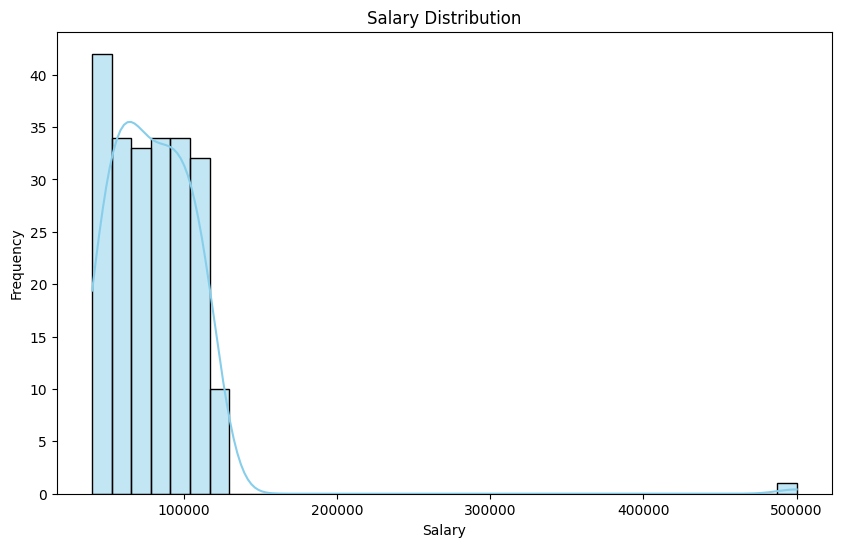

/tmp/ipykernel_101053/164067960.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='performance_rating', data=data, palette='viridis')


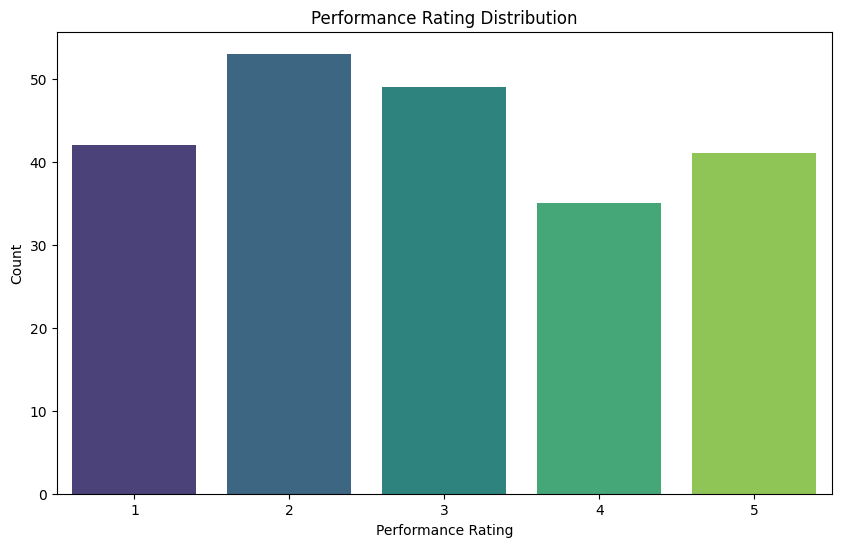

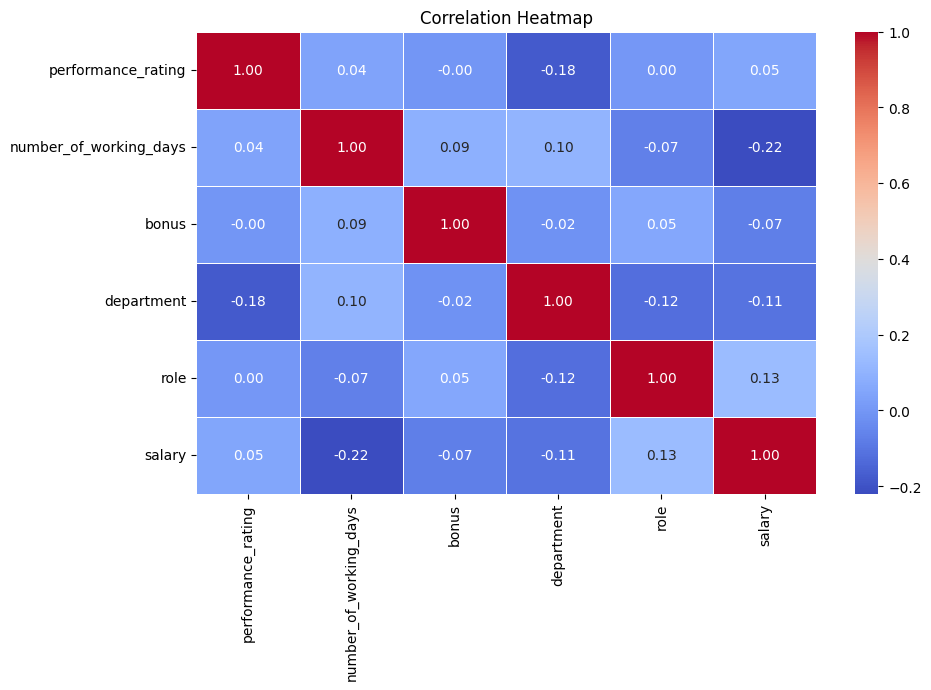

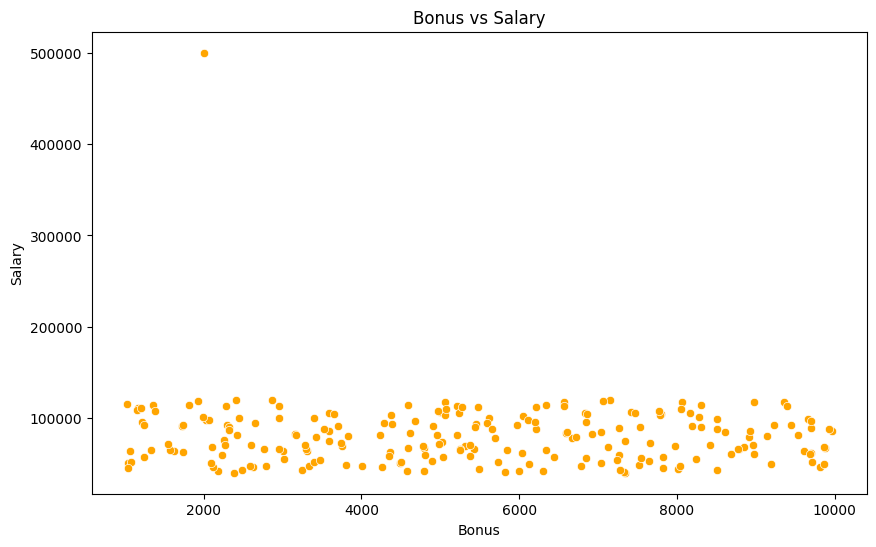

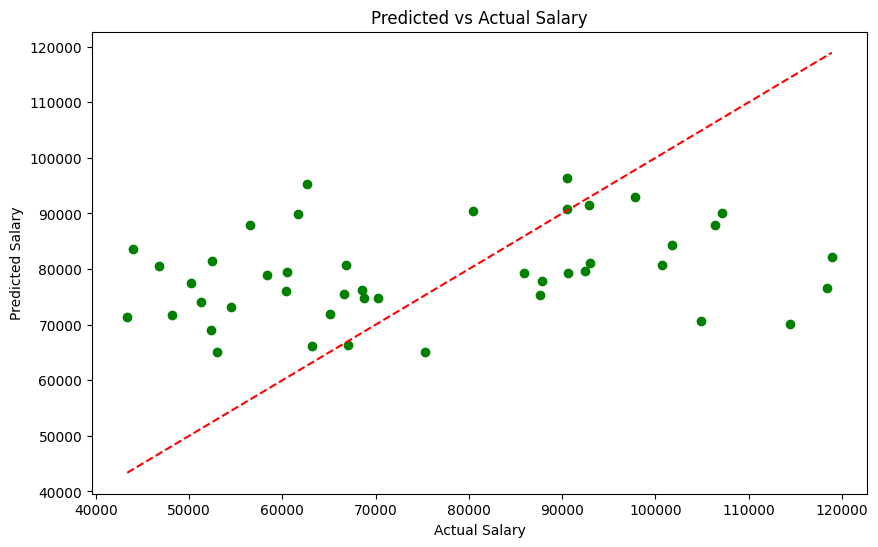

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = '/workspaces/AD_database/Project/employees_data.csv'
data = pd.read_csv(file_path)

# Handle missing data for numeric columns only
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Convert categorical columns to numerical using LabelEncoder
label_encoder = LabelEncoder()
data['department'] = label_encoder.fit_transform(data['department'])
data['role'] = label_encoder.fit_transform(data['role'])
data['project_status'] = label_encoder.fit_transform(data['project_status'])

# Features for prediction
features = ['performance_rating', 'number_of_working_days', 'bonus', 'department', 'role']
target = 'salary'

# Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Visualizations

# 1. Salary distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['salary'], kde=True, color='skyblue')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# 2. Performance Rating Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='performance_rating', data=data, palette='viridis')
plt.title('Performance Rating Distribution')
plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = data[features + [target]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 4. Bonus vs Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['bonus'], y=data['salary'], color='orange')
plt.title('Bonus vs Salary')
plt.xlabel('Bonus')
plt.ylabel('Salary')
plt.show()

# 5. Salary Prediction vs Actual (for test data)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicted vs Actual Salary')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()
